In [1]:
import numpy as np
from matplotlib import pyplot

In [2]:
def flux(psi_l, psi_r, C):
    return .5 * (C + abs(C)) * psi_l + \
           .5 * (C - abs(C)) * psi_r

In [3]:
def upwind(psi, i, C):
    return psi[i] - flux(psi[i    ], psi[i+one], C[i]) + \
                    flux(psi[i-one], psi[i    ], C[i-one]) 

In [4]:
def psi_0(x):
    # https://en.wikipedia.org/wiki/Witch_of_Agnesi
    a = 5
    return 8*a**3 / (x**2 + 4*a**2)

In [5]:
class shift:
    def __radd__(self, i): 
        return slice(i.start+1, i.stop+1)
    def __rsub__(self, i): 
        return slice(i.start-1, i.stop-1)
one = shift()

s = slice(0,10)
print(s)
print(s+one)
print(s-one)

slice(0, 10, None)
slice(1, 11, None)
slice(-1, 9, None)


In [6]:
nt = 50
nx = 75
x, dx = np.linspace(-100, 200, nx, endpoint=False, retstep=True)
dt = 1
C = .5
v = C / dt * dx
i = slice(1,nx-2)
C_phys = np.full(nx-1, C)

In [7]:
def plot(x, psi, psi_0, title, v, nt):
    pyplot.step(x, psi_0(x), label='initial', where='mid')
    pyplot.step(x, psi_0(x-v*nt), label='analytical', where='mid')
    pyplot.step(x, psi, label='numerical', where='mid')
    pyplot.grid()
    pyplot.legend()
    pyplot.title(title)
    pyplot.show()

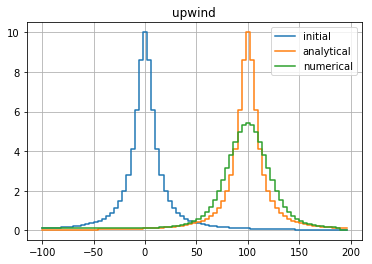

In [8]:
psi = psi_0(x)
for _ in range(nt):
    psi[i] = upwind(psi, i, C_phys)
plot(x, psi, psi_0, 'upwind', v, nt)

In [9]:
def C_corr(C, nx, psi):
    j = slice(0, nx-1)
    return (abs(C[j]) - C[j]**2) * (psi[j+one] - psi[j]) / (psi[j+one] + psi[j])

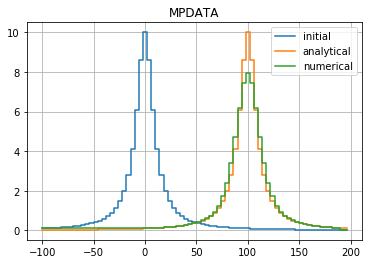

In [10]:
psi = psi_0(x)
for _ in range(nt):
    psi[i] = upwind(psi, i, C_phys)
    psi[i] = upwind(psi, i, C_corr(C_phys, nx, psi))
plot(x, psi, psi_0, 'MPDATA', v, nt)

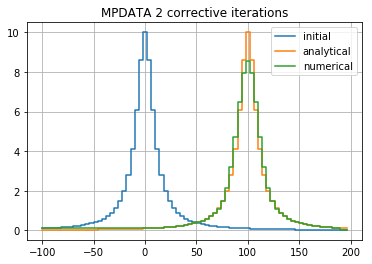

In [11]:
psi = psi_0(x)
n_corr_it = 2
for _ in range(nt):
    psi[i] = upwind(psi, i, C_phys)
    C_iter = C_phys
    for it in range(n_corr_it):
        C_iter = C_corr(C_iter, nx, psi)
        psi[i] = upwind(psi, i, C_iter)
plot(x, psi, psi_0, f'MPDATA {n_corr_it} corrective iterations', v, nt)